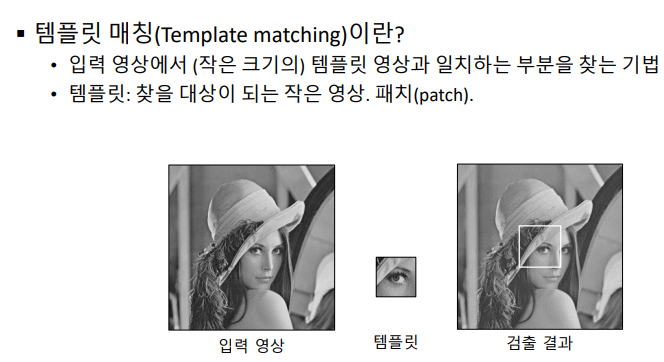
내가 찾고자하는 객체의 모양을 담고있는 영상을 템플릿 영상이라고 합니다. 커널이라고도 부르며, 레나의 눈 무분이 어디 있는지 찾아서 사각형 마킹을 해 줍니다.


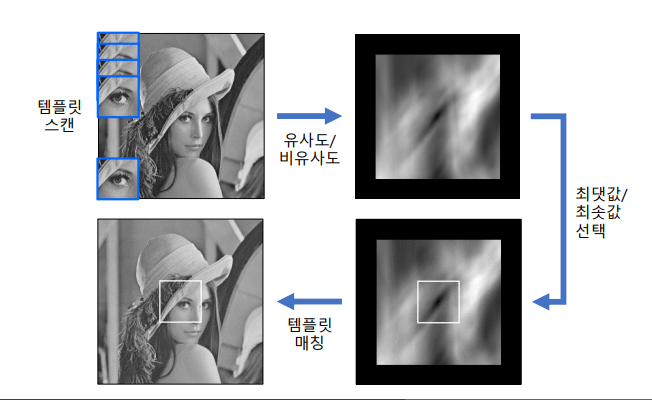
좌측 상단부터 스캔을 하면서 입력영상의 유사도를 계산합니다.    
유사도 계산 : GRAYSCALE영상에서 비슷한 부분은 밝게  
비유사도 계산 : GRAYSCALE영상에서 비슷한 부분은 어둡게  
따라서 비슷한 부분은 밝게 출력됩니다. 또한 바깥에 가상의 픽셀이 있다고 가정하지 않습니다. 그래서 템플릿 영상안에서만 유사도를 측정합니다. 최대값과 최소값위치를 마킹해주며 유사도면 최대값, 비유사도면 최소값 위치를 찾아줍니다. 

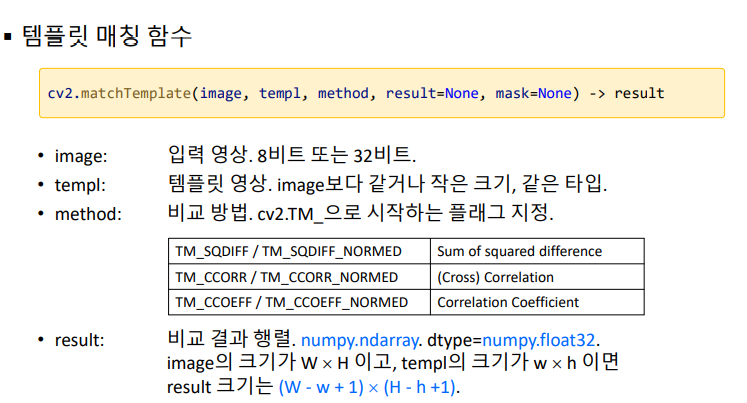
1. 입력영상  
2. 템플릿 영상(커널)  
3. 유사도로 검사할 것인지, 비 유사도로 검사할 것인지를 선택합니다. 위 6가지 중 하나의 플래그로 지정하면 됩니다.  
4. result로 출력합니다.

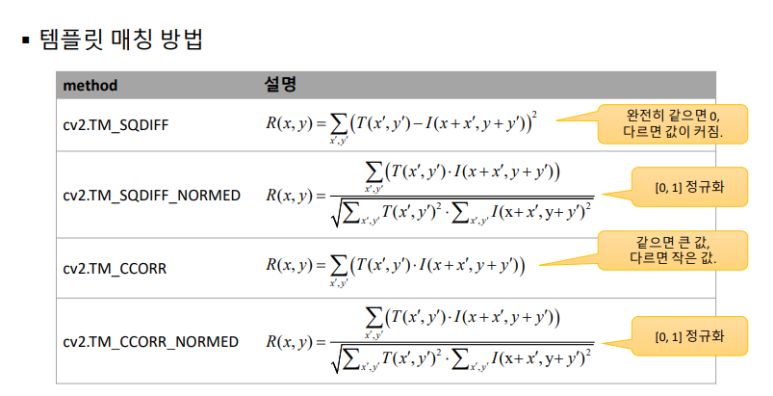  
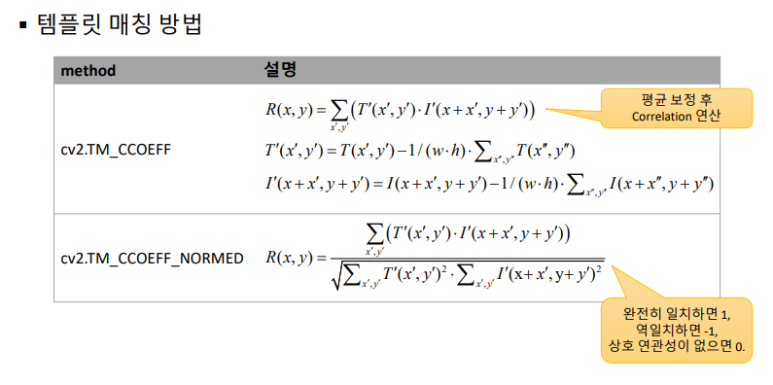 마지막 Norm을 가장 많이 사용합니다.  
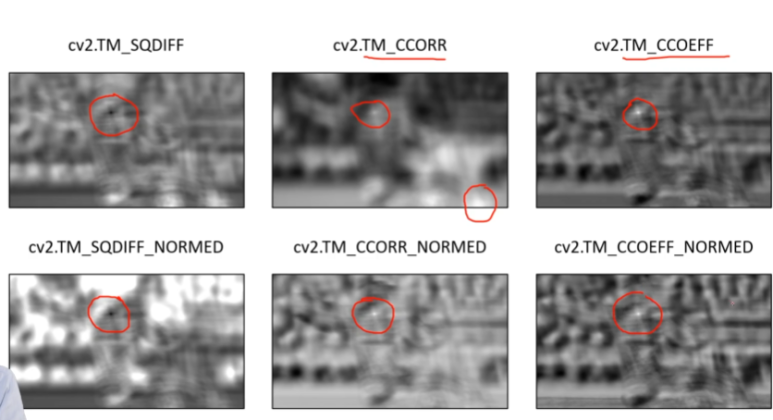

In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random


!pip install opencv-python

입력영상과 커널을 불러와 줍니다.

(<AxesSubplot:>,
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x15a953c7370>)

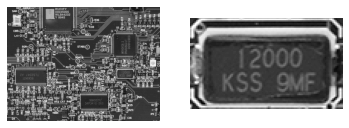

In [3]:
src = cv2.imread('circuit.bmp', cv2.IMREAD_GRAYSCALE)

templ = cv2.imread('crystal.bmp', cv2.IMREAD_GRAYSCALE)
plt.subplot(121),plt.axis('off'),plt.imshow(src,cmap='gray')
plt.subplot(122),plt.axis('off'),plt.imshow(templ,cmap='gray')

예외처리

In [4]:
if src is None or templ is None:

    print('Image load failed!')

    sys.exit()

입력영상 밝기 50, 가우시안 잡음 10을 추가해 줍니다.

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x15a95870100>)

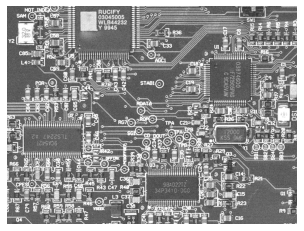

In [7]:
noise = np.zeros(src.shape, np.int32)
cv2.randn(noise,50,10)
src=cv2.add(src,noise,dtype=cv2.CV_8UC3)
plt.axis('off'),plt.imshow(src,cmap='gray')

이제 res는 -1~0~1사이의 실수형 행렬이며, 이제 최대값을 찾으면 됩니다.

In [16]:
res = cv2.matchTemplate(src, templ, cv2.TM_CCOEFF_NORMED)

실수형을 그레이스케일 영상으로 변환해줍니다.

In [9]:
res_norm=cv2.normalize(res,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U)

미니멈은 상관없기에 받지않고 맥시멈과 좌표를 받습니다. 만약에 크리스탈이 없다한들 어쨌거나 최대값을 출력해 줍니다. 따라서 임계값을 정해두고 그 이상값만 신뢰할 수 있다고 보는게 옳습니다.

In [10]:
_, maxv, _, maxloc = cv2.minMaxLoc(res)

0.98정도면 신뢰할 수 있다고 볼 수 있습니다. 그리고 실제 크리스탈 이미지이기도 하니.

In [12]:
print('maxv:', maxv)

print('maxloc:', maxloc)

maxv: 0.9800653457641602
maxloc: (568, 320)


In [13]:
th, tw = templ.shape[:2]

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

cv2.rectangle(dst, maxloc, (maxloc[0] + tw, maxloc[1] + th), (0, 0, 255), 2)

array([[[ 81,  81,  81],
        [ 99,  99,  99],
        [ 65,  65,  65],
        ...,
        [111, 111, 111],
        [118, 118, 118],
        [137, 137, 137]],

       [[104, 104, 104],
        [102, 102, 102],
        [ 91,  91,  91],
        ...,
        [213, 213, 213],
        [200, 200, 200],
        [191, 191, 191]],

       [[ 78,  78,  78],
        [105, 105, 105],
        [ 90,  90,  90],
        ...,
        [223, 223, 223],
        [217, 217, 217],
        [217, 217, 217]],

       ...,

       [[116, 116, 116],
        [108, 108, 108],
        [ 91,  91,  91],
        ...,
        [205, 205, 205],
        [179, 179, 179],
        [162, 162, 162]],

       [[102, 102, 102],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [255, 255, 255],
        [213, 213, 213],
        [176, 176, 176]],

       [[104, 104, 104],
        [100, 100, 100],
        [ 93,  93,  93],
        ...,
        [216, 216, 216],
        [137, 137, 137],
        [129, 129, 129]]

(<AxesSubplot:>,
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x15a95bfa700>)

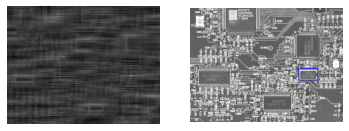

In [14]:
plt.subplot(121),plt.axis('off'),plt.imshow(res_norm,cmap='gray')
plt.subplot(122),plt.axis('off'),plt.imshow(dst,cmap='gray')

In [15]:
cv2.imshow('res_norm', res_norm)

cv2.imshow('dst', dst)

cv2.waitKey()

cv2.destroyAllWindows()